In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:

# Specify the path to your saved model
model_path = 'DeepSegNet.h5'

# Load the model
loaded_model = tf.keras.models.load_model(model_path)

# Optionally, print the model summary to verify it's loaded correctly
loaded_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 96, 128, 3)]         0         []                            
                                                                                                  
 conv2d_20 (Conv2D)          (None, 96, 128, 32)          896       ['input_2[0][0]']             
                                                                                                  
 conv2d_21 (Conv2D)          (None, 96, 128, 32)          9248      ['conv2d_20[0][0]']           
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 48, 64, 32)           0         ['conv2d_21[0][0]']           
 g2D)                                                                                       

In [3]:
import os
path = '/Users/akshay/projects/unet'
image_path = os.path.join(path, './archive_orgi/dataB/dataB/CameraRGB/')
mask_path = os.path.join(path, './archive_orgi/dataB/dataB/CameraSeg/')

# List original image files in the image path directory
image_list_orig = os.listdir(image_path)

# Create full paths for images and masks
image_list = [image_path + i for i in image_list_orig]
mask_list = [mask_path + i for i in image_list_orig]
image_list

['/Users/akshay/projects/unet/./archive_orgi/dataB/dataB/CameraRGB/07_00_112.png',
 '/Users/akshay/projects/unet/./archive_orgi/dataB/dataB/CameraRGB/02_02_172.png',
 '/Users/akshay/projects/unet/./archive_orgi/dataB/dataB/CameraRGB/10_00_053.png',
 '/Users/akshay/projects/unet/./archive_orgi/dataB/dataB/CameraRGB/08_00_173.png',
 '/Users/akshay/projects/unet/./archive_orgi/dataB/dataB/CameraRGB/F65-13.png',
 '/Users/akshay/projects/unet/./archive_orgi/dataB/dataB/CameraRGB/02_01_072.png',
 '/Users/akshay/projects/unet/./archive_orgi/dataB/dataB/CameraRGB/F62-32.png',
 '/Users/akshay/projects/unet/./archive_orgi/dataB/dataB/CameraRGB/03_00_153.png',
 '/Users/akshay/projects/unet/./archive_orgi/dataB/dataB/CameraRGB/06_00_022.png',
 '/Users/akshay/projects/unet/./archive_orgi/dataB/dataB/CameraRGB/05_00_212.png',
 '/Users/akshay/projects/unet/./archive_orgi/dataB/dataB/CameraRGB/F3-82.png',
 '/Users/akshay/projects/unet/./archive_orgi/dataB/dataB/CameraRGB/F61-63.png',
 '/Users/akshay/p

In [11]:
# Create a TensorFlow dataset from the list of image file paths
image_list_ds = tf.data.Dataset.list_files(image_list, shuffle=False)

# Create a TensorFlow dataset from the list of mask file paths
mask_list_ds = tf.data.Dataset.list_files(mask_list, shuffle=False)

image_filenames = tf.constant(image_list)  # Convert image list to TensorFlow constant
masks_filenames = tf.constant(mask_list)   # Convert mask list to TensorFlow constant

dataset = tf.data.Dataset.from_tensor_slices((image_filenames, masks_filenames))


def process_path(image_path, mask_path):
    img = tf.io.read_file(image_path)  # Read the image file
    img = tf.image.decode_png(img, channels=3)  # Decode the PNG image
    img = tf.image.convert_image_dtype(img, tf.float32)  # Convert image to float32 dtype

    mask = tf.io.read_file(mask_path)  # Read the mask file
    mask = tf.image.decode_png(mask, channels=3)  # Decode the PNG mask
    mask = tf.math.reduce_max(mask, axis=-1, keepdims=True)  # Reduce mask to single channel
    return img, mask

def preprocess(image, mask):
    input_image = tf.image.resize(image, (96, 128), method='nearest')  # Resize the image
    input_mask = tf.image.resize(mask, (96, 128), method='nearest')  # Resize the mask

    return input_image, input_mask

# Apply the process_path function to each element in the dataset
image_ds = dataset.map(process_path)

# Apply the preprocess function to each element in the processed image dataset
processed_image_ds = image_ds.map(preprocess)

def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]


def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [12]:
def show_predictions(dataset=None, num=1):
    """
    Displays the first image of each of the num batches
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = loaded_model.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        print('gg')

1/1 [==============================] - 2s 2s/step


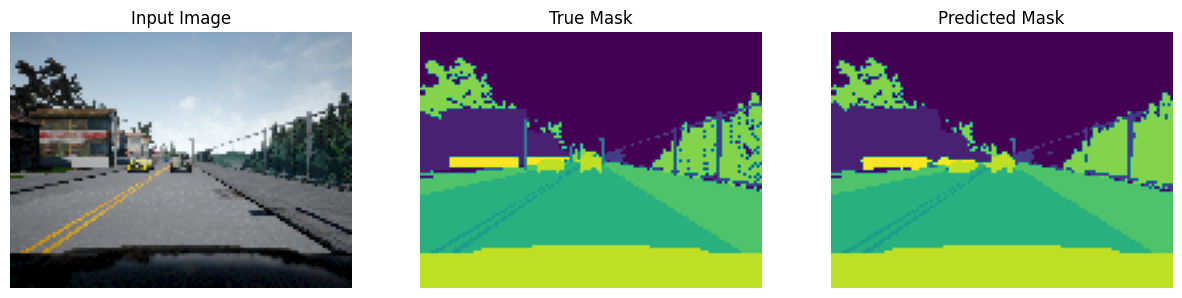

1/1 [==============================] - 2s 2s/step


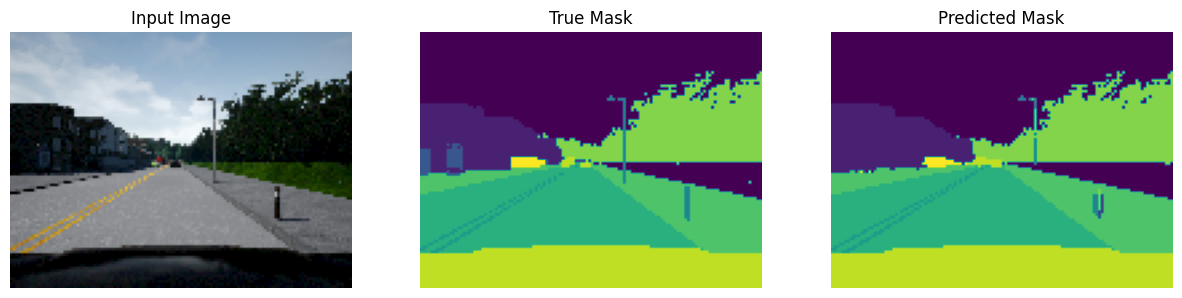

1/1 [==============================] - 2s 2s/step


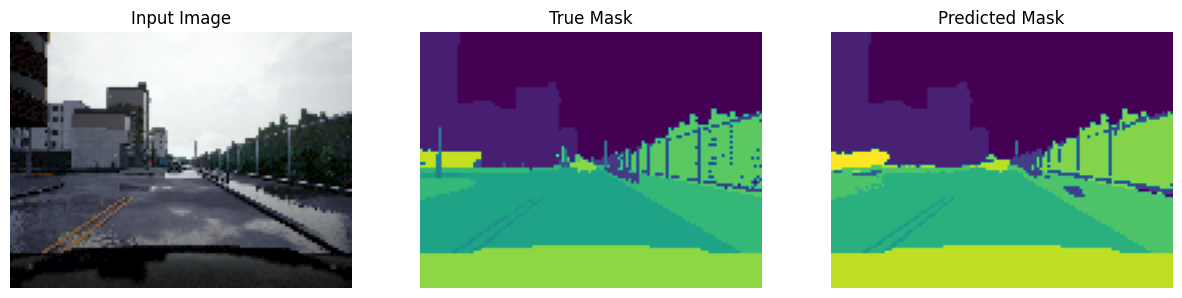

1/1 [==============================] - 2s 2s/step


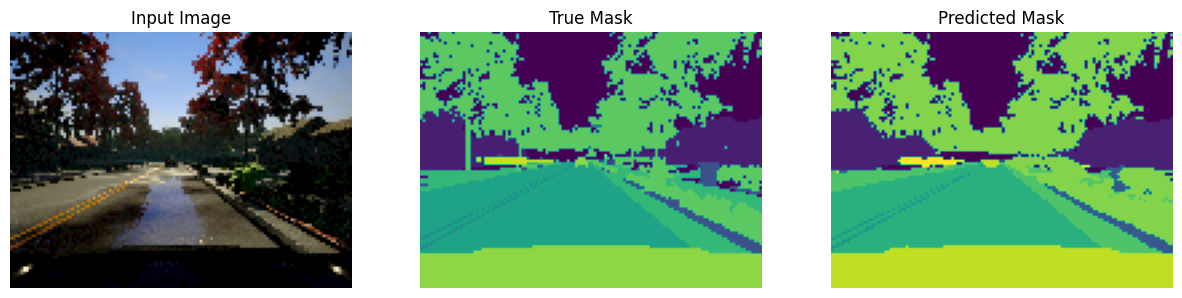

1/1 [==============================] - 2s 2s/step


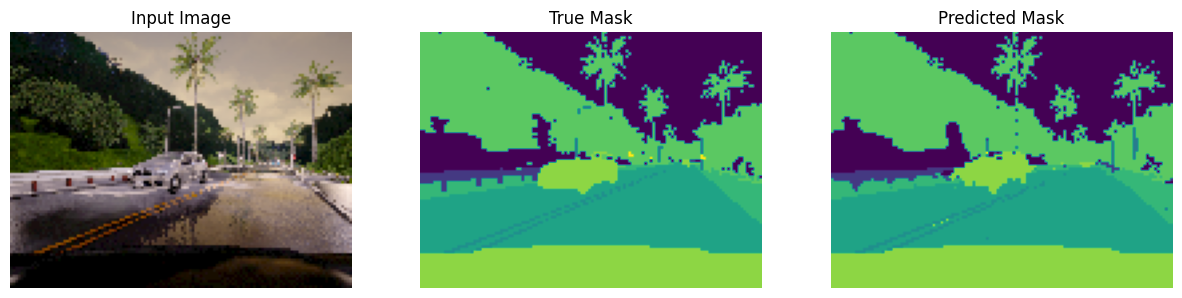

1/1 [==============================] - 2s 2s/step


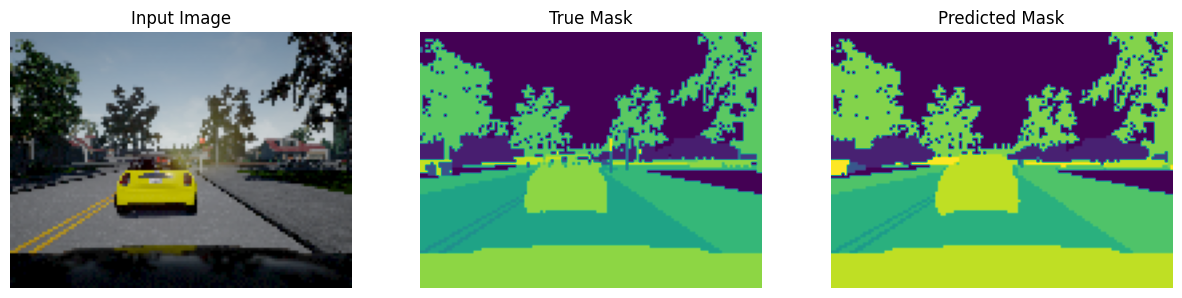

1/1 [==============================] - 2s 2s/step


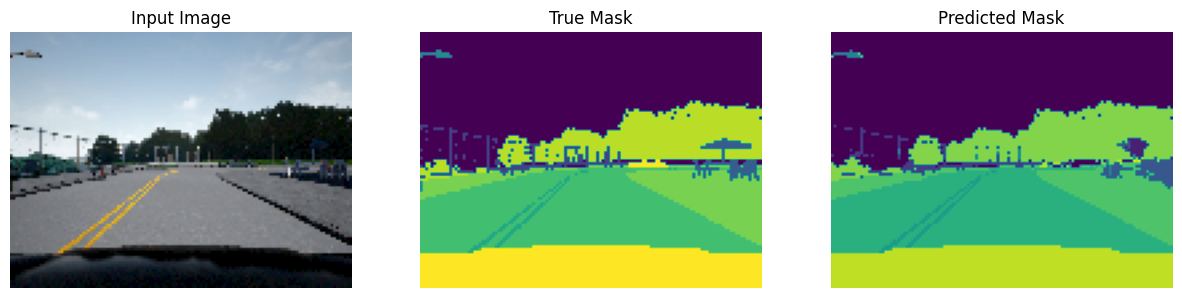

1/1 [==============================] - 2s 2s/step


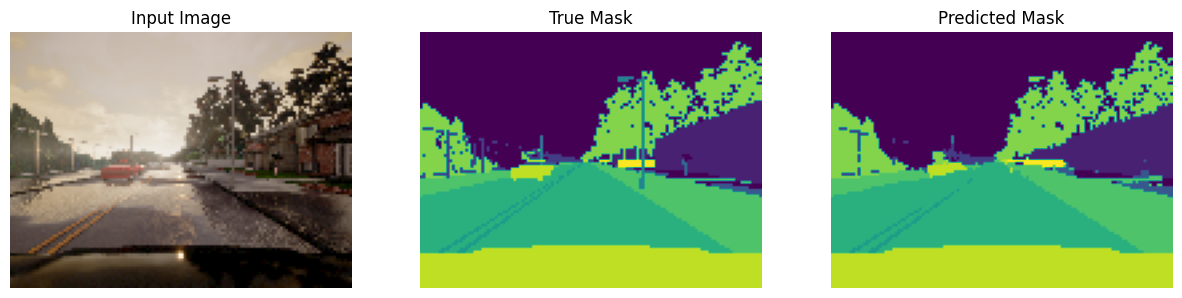

1/1 [==============================] - 2s 2s/step


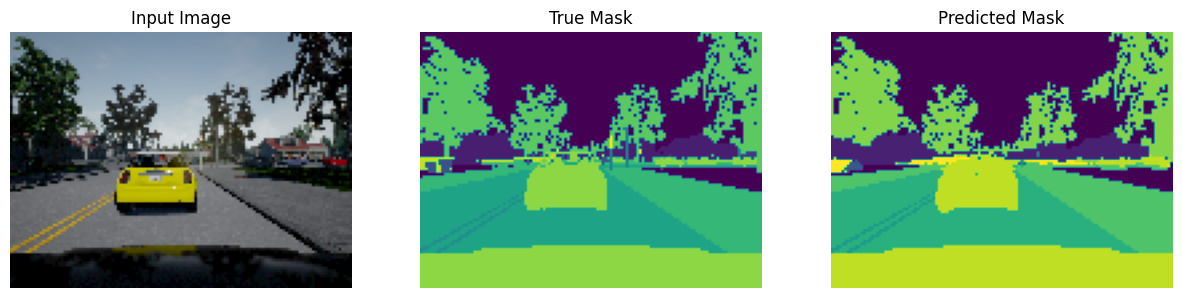

1/1 [==============================] - 2s 2s/step


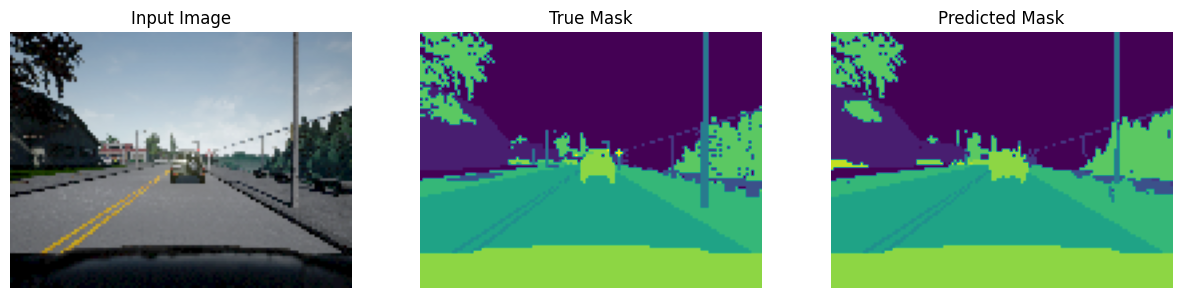

1/1 [==============================] - 2s 2s/step


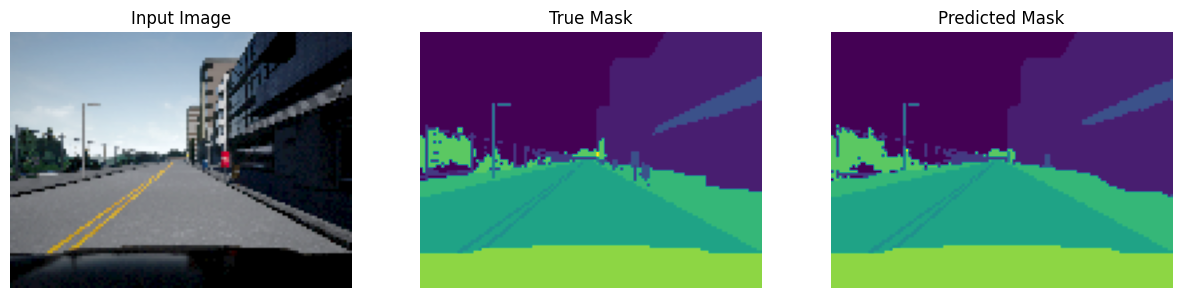

2024-05-19 11:47:31.111223: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


KeyboardInterrupt: 

In [ ]:
BUFFER_SIZE = 500  # Buffer size for shuffling the dataset
BATCH_SIZE = 32  # Batch size for training
train_dataset = processed_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
show_predictions(train_dataset, 116)